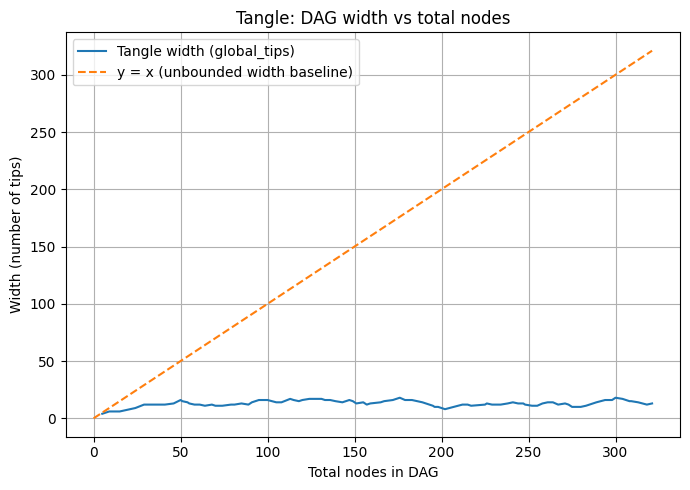

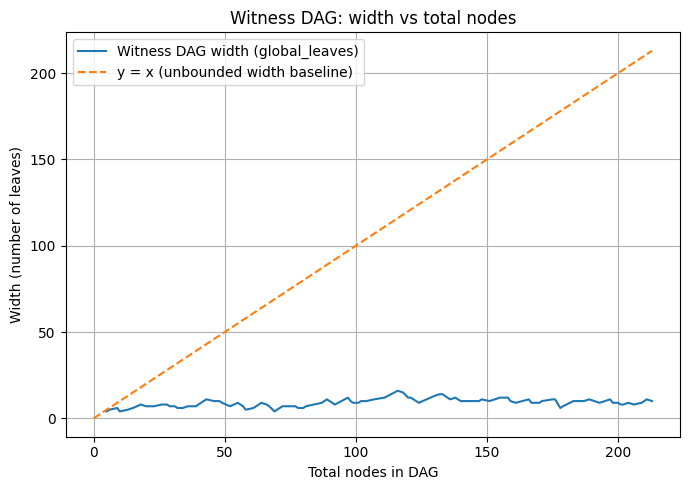

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------- Load data ----------

tangle_path = 'data/tangle_results.csv'
witness_path = 'data/witness_results.csv'

tangle = pd.read_csv(tangle_path)
witness = pd.read_csv(witness_path)

# Sanity: print columns if needed
# print(tangle.columns)
# print(witness.columns)

# ---------- Extract width & nodes ----------

# Tangle: use global_tips as DAG width
if 'global_tips' in tangle.columns:
    tangle_width = tangle['global_tips']
else:
    raise ValueError("Expected 'global_tips' column in tangle_results.csv")

tangle_nodes = tangle['total_nodes']

# Witness: use global_leaves as DAG width
if 'global_leaves' in witness.columns:
    witness_width = witness['global_leaves']
else:
    raise ValueError("Expected 'global_leaves' column in witness_results.csv")

witness_nodes = witness['total_nodes']

# ---------- Plot 1: Tangle (width vs total_nodes + y=x) ----------

plt.figure(figsize=(7, 5))

plt.plot(tangle_nodes, tangle_width, label='Tangle width (global_tips)')

max_nodes_tangle = tangle_nodes.max()
line_x_t = np.linspace(0, max_nodes_tangle, 200)
plt.plot(line_x_t, line_x_t, '--', label='y = x (unbounded width baseline)')

plt.xlabel('Total nodes in DAG')
plt.ylabel('Width (number of tips)')
plt.title('Tangle: DAG width vs total nodes')
plt.legend()
plt.grid(True)
plt.tight_layout()

# ---------- Plot 2: Witness DAG (width vs total_nodes + y=x) ----------

plt.figure(figsize=(7, 5))

plt.plot(witness_nodes, witness_width, label='Witness DAG width (global_leaves)')

max_nodes_witness = witness_nodes.max()
line_x_w = np.linspace(0, max_nodes_witness, 200)
plt.plot(line_x_w, line_x_w, '--', label='y = x (unbounded width baseline)')

plt.xlabel('Total nodes in DAG')
plt.ylabel('Width (number of leaves)')
plt.title('Witness DAG: width vs total nodes')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
